# Example usage notebook

In [30]:
import numpy as np
import xarray as xr

from xfit import fit_dataArray, fit_dataset

## Generating dummy data

In [21]:
ms = xr.DataArray(np.arange(6), coords = {'m_true': np.arange(6)}, dims='m_true')
bs = xr.DataArray(np.linspace(0,10,6), coords={'b_true': np.linspace(0,10,6)}, dims='b_true')
xs = xr.DataArray(np.linspace(0,20,101), coords={'x': np.linspace(0,20,101)}, dims='x')

data = xs*ms + bs
data.values += 5*(np.random.rand(101, 6, 6)-0.5) # adding some noise

The data we have made are lines where the coordinates index the true slope and intercept:

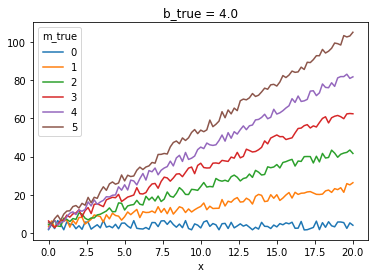

In [22]:
data.sel(b_true=4).plot.line(x='x')

## Fitting DataArrays

In [23]:
# The function we want to fit over
def lin_func(x, m, b):
    return m*x + b

# These need to be in the same order they are introduced in the fit function, so 'm' was 
# first and it's first in this list
lin_params = [ 
    'm',
    'b'
]

# the function to generate guesses
def lin_func_guess(x, y, **kwargs): # you should always include the "**kwargs" piece, read the documentation for why
    m_guess = (y[-1] - y[0])/(x[-1] - x[0])
    b_guess = y[0] - m_guess*x[0]
    
    return m_guess, b_guess # must be returned in the order they are taken in the fit function

In [24]:
fit = fit_dataArray(
    data,
    lin_func,
    lin_func_guess,
    lin_params,
    'x'
)

The results of the fitting are stored in the `fit_ds` attribute

In [25]:
fit.fit_ds

<xarray.Dataset>
Dimensions:  (b_true: 6, m_true: 6)
Coordinates:
  * m_true   (m_true) int64 0 1 2 3 4 5
  * b_true   (b_true) float64 0.0 2.0 4.0 6.0 8.0 10.0
Data variables:
    m        (m_true, b_true) float64 -0.01082 -0.00804 0.007528 ... 5.017 4.986
    b        (m_true, b_true) float64 0.05832 1.9 3.787 ... 6.125 7.668 10.42
    m_err    (m_true, b_true) float64 0.02611 0.0231 0.02575 ... 0.02409 0.02354
    b_err    (m_true, b_true) float64 0.3022 0.2674 0.2981 ... 0.2789 0.2725

We can plot the fit functions over the original data to do a quick diagnostic:

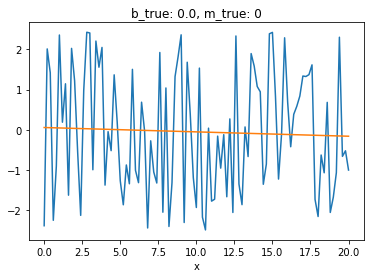

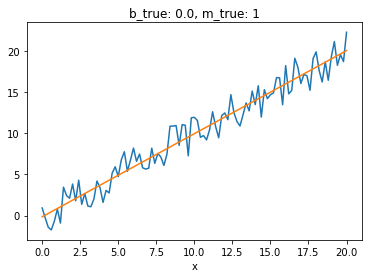

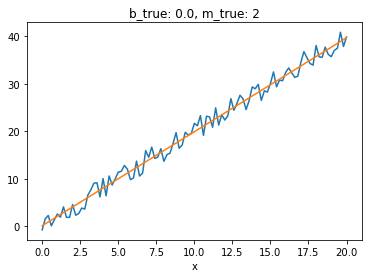

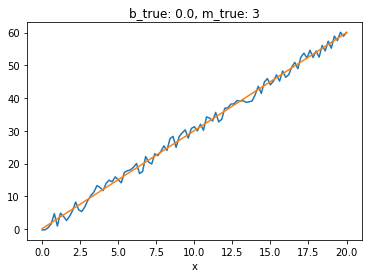

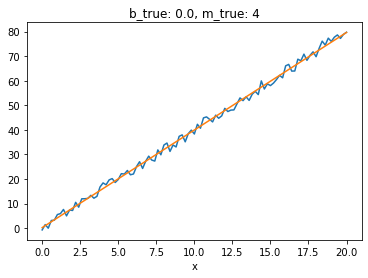

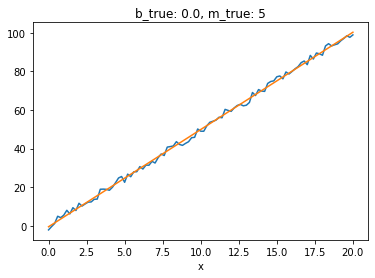

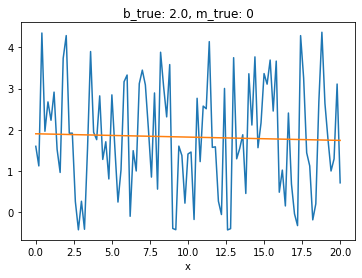

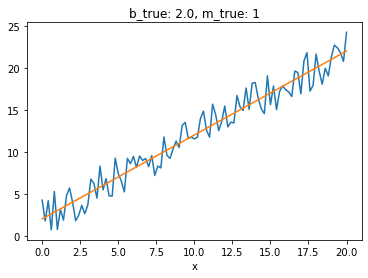

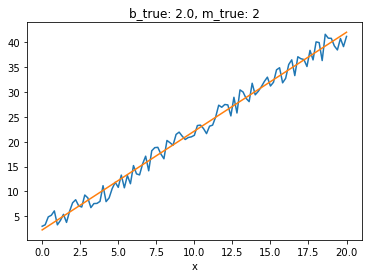

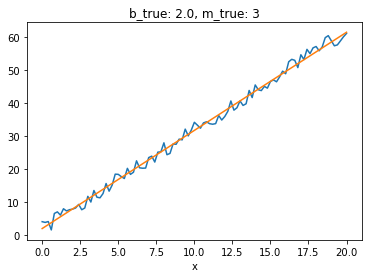

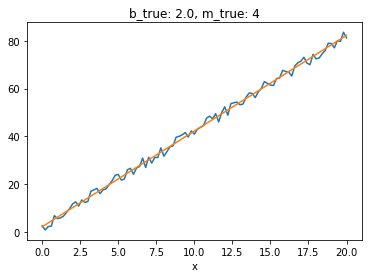

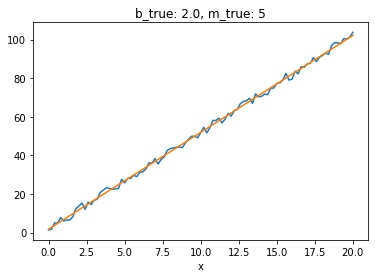

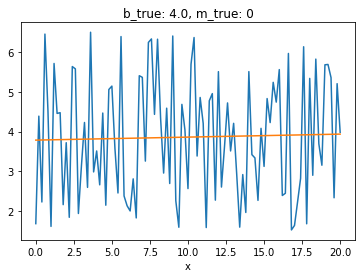

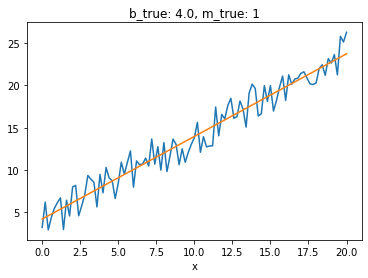

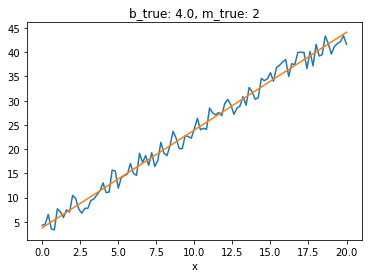

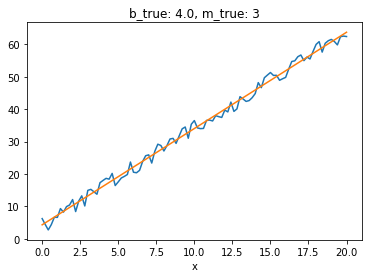

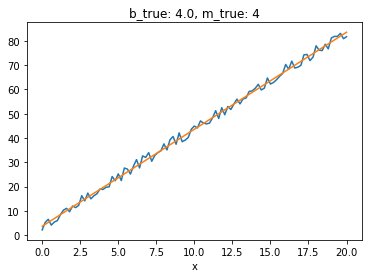

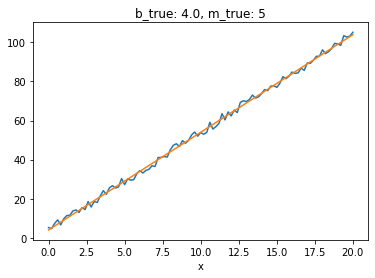

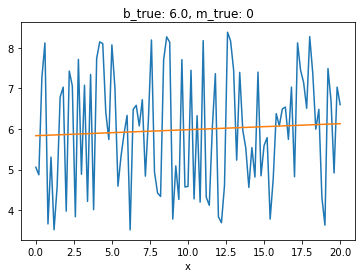

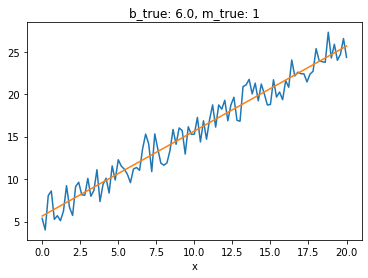

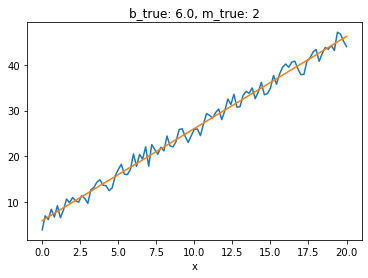

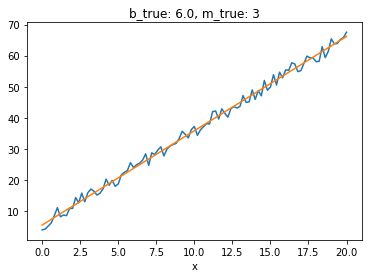

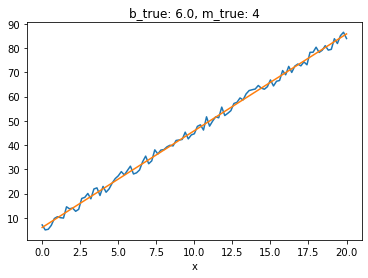

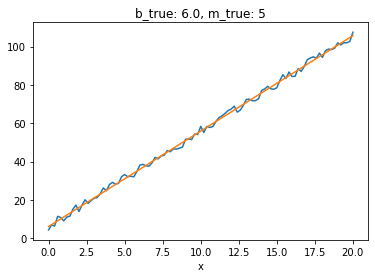

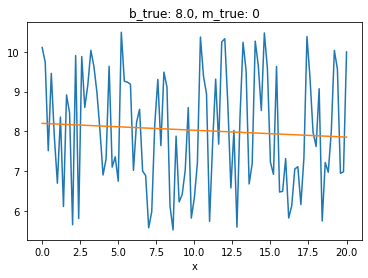

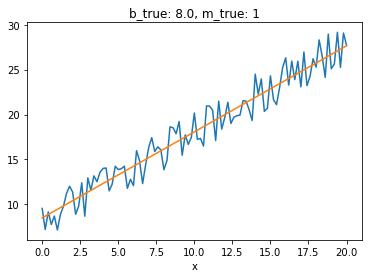

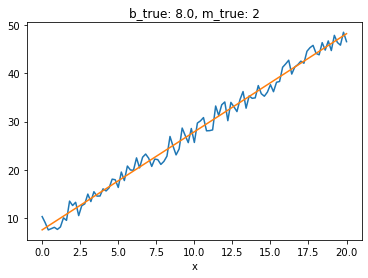

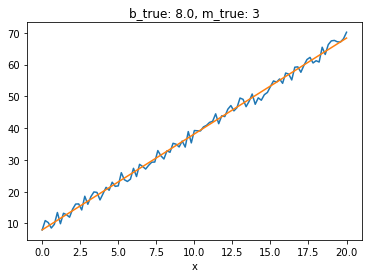

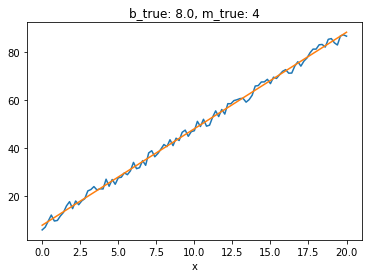

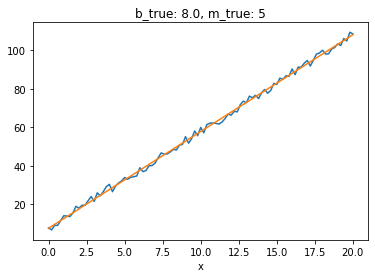

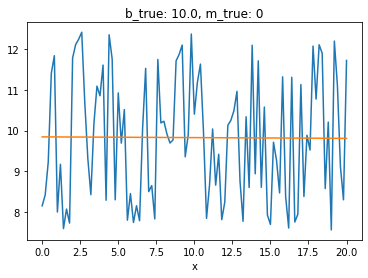

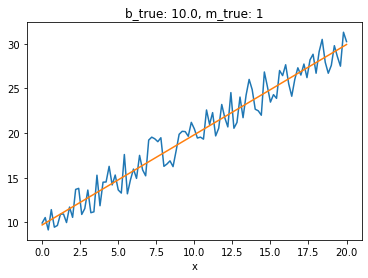

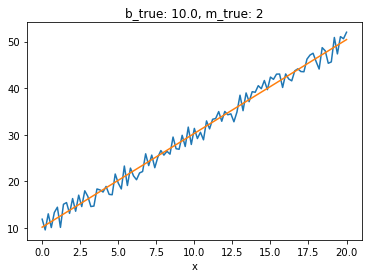

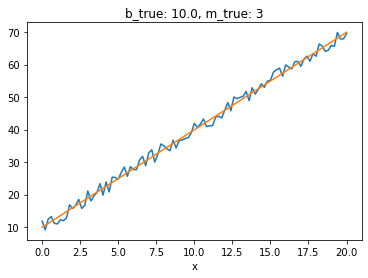

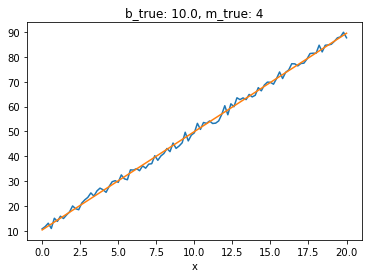

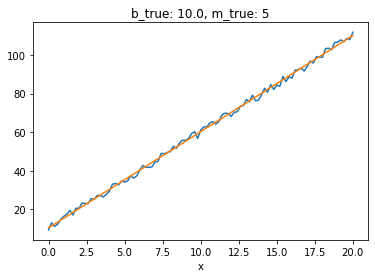

In [26]:
fit.plot_fits()

Since our dataset had coordinates which corresponded to the true slope and intercept, we can plot these vs the fit values

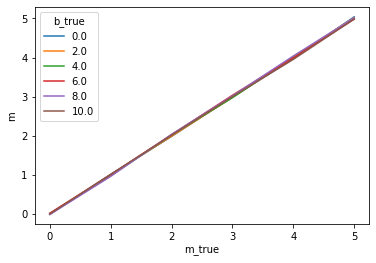

In [27]:
fit.fit_ds['m'].plot.line(x='m_true')

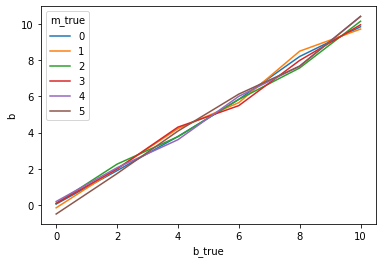

In [28]:
fit.fit_ds['b'].plot.line(x='b_true')

## Fitting Datasets

In [31]:
data_ds = xr.Dataset(data_vars={'mydata': data})

Fitting is basically the same, except we now also need to specify the data variable containing the data we would like to fit over

In [33]:
fit2 = fit_dataset(
    data_ds,
    lin_func,
    lin_func_guess,
    lin_params,
    'x',
    'mydata'
)

`fit2` is the same type of object as `fit`

In [35]:
type(fit) == type(fit2)

True

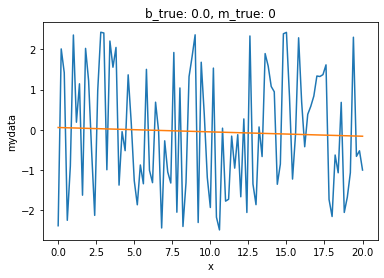

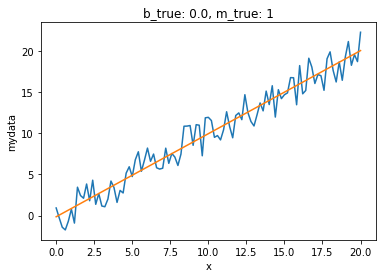

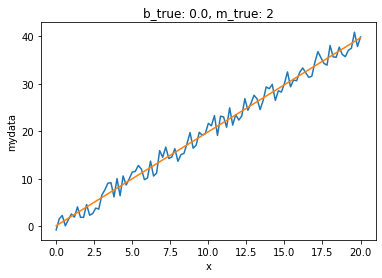

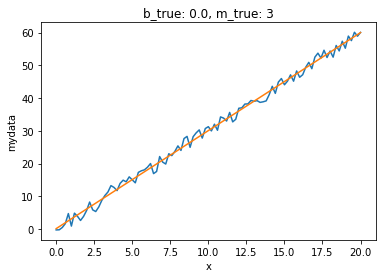

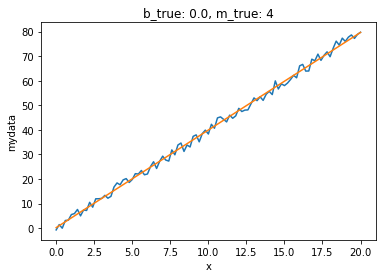

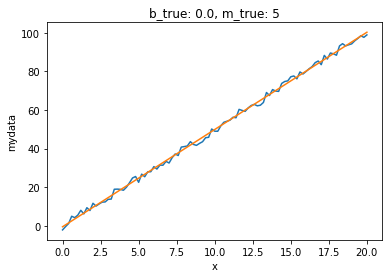

In [39]:
fit2.plot_fits(b_true=0)

In this case, they are effectively identical

In [38]:
(fit.fit_ds == fit2.fit_ds).all()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    m        bool True
    b        bool True
    m_err    bool True
    b_err    bool True